Recommendation System for an e-commerce website

Dataset used: https://www.kaggle.com/skillsmuggler/amazon-ratings

In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading dataset and renaming columns
columns = ['userID', 'productID', 'ratings','timestamp']
amazon_ratings = pd.read_csv('C:/Users/HP/Desktop/ratings_Beauty.csv',names=columns)

In [3]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023071 entries, 0 to 2023070
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userID     object
 1   productID  object
 2   ratings    object
 3   timestamp  object
dtypes: object(4)
memory usage: 61.7+ MB


In [4]:
amazon_ratings.head()

,userID,productID,ratings,timestamp
0,UserId,ProductId,Rating,Timestamp
1,A39HTATAQ9V7YF,0205616461,5.0,1369699200
2,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
3,A1Z513UWSAAO0F,0558925278,5.0,1404691200
4,A1WMRR494NWEWV,0733001998,4.0,1382572800


In [5]:
amazon_ratings.shape

(2023071, 4)

In [6]:
amazon_ratings.describe().T

,count,unique,top,freq
userID,2023071,1210272,A3KEZLJ59C1JVH,389
productID,2023071,249275,B001MA0QY2,7533
ratings,2023071.0,11.0,5.0,1165521.0
timestamp,2023071,7848,1380672000,5499


In [7]:
#Dropping the "timestamp" as it is not a needed field in this case
amazon_ratings = amazon_ratings.drop('timestamp', axis=1)

In [8]:
#Returns the number of missing values in each column
amazon_ratings.isna().sum()

userID       0
productID    0
ratings      0
dtype: int64

In [9]:
#For histogram based on most no. of ratings
popular_products = pd.DataFrame(amazon_ratings.groupby('productID')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
productID,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='productID'>

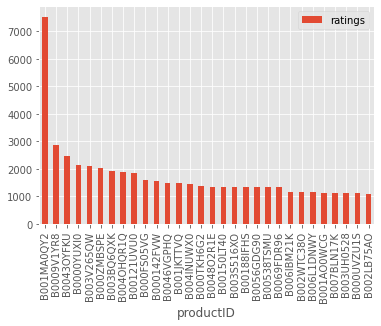

In [10]:
#Most popular products based on their ratings
most_popular.head(30).plot(kind = "bar")

In [12]:
# find unique users
amazon_ratings.userID.value_counts()

A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
A3B7ROUPU3OA1Q      1
A28OZWVQKJ0DO4      1
A252U39SQKJ1US      1
AMNHME7GD7RUB       1
A2FM2VU7UV2HXE      1
Name: userID, Length: 1210272, dtype: int64

In [13]:
print('Number of unique users', len(amazon_ratings['userID'].unique()))

Number of unique users 1210272


In [14]:
print('Number of unique products', len(amazon_ratings['productID'].unique()))

Number of unique products 249275


In [17]:
print('Unique Ratings', amazon_ratings['ratings'].unique())

Unique Ratings ['Rating' '5.0' '3.0' '4.0' '1.0' '2.0' 5.0 4.0 1.0 2.0 3.0]


In [18]:
#Keep the users only who has given 50 or more number of ratings
userID = amazon_ratings.groupby('userID').count()
top_user = userID[userID['ratings'] >= 50].index
topuser_ratings_df = amazon_ratings[amazon_ratings['userID'].isin(top_user)]
topuser_ratings_df.head()

,userID,productID,ratings
6,AKJHHD5VEH7VG,0762451459,5.0
43,A22ZFXQE8AWPEP,1304482596,1.0
48,A22ZFXQE8AWPEP,1304482685,1.0
53,A22ZFXQE8AWPEP,1304495396,1.0
62,A22ZFXQE8AWPEP,1304511111,1.0


In [19]:
#Keep data only for products that have 50 or more ratings
prodID = amazon_ratings.groupby('productID').count()
top_prod = prodID[prodID['ratings'] >= 50].index
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]

In [20]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]

In [21]:
top_ratings_df.head()

,userID,productID,ratings
1718,A2FQZKL2KIZACO,9790790961,5.0
1746,A3TYR1ALBZ2EU9,9790790961,5.0
2493,A2VOGNBUMXSW13,B00004TMFE,2.0
3336,A3AZI828WJN1CD,B00004U9UY,4.0
3413,A287547UH1VBJ7,B00004U9UY,4.0
